In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [11]:
#Read all your files
appt_file = "location of your file"

#make sure you specify the row number of your header
df_data = pd.read_csv(appt_file, header=1) 

In [13]:
df_data.shape #for the dimension of the dataframe : (row, column)

(600, 21)

In [ ]:
df_data['ID'] = df_data.ID.apply(str) #Convert student ID to string

#if you need to join values from two cells in two columns
df_data["admin_name"] = df_data[["admin_fName", "admin_lName"]].apply(lambda x: ' '.join(x), axis=1) 

In [33]:
'''
Renaming parameters: you can either use rename or replace function
using rename: df_name.rename(columns={"current_name":"new_name"})
using replace: df_name.replace("current_name", "new_name")
using inplace makes the changes within the dataframe
'''

df_data.rename(columns = {"School Of": "college_name", "ClassLevel": "student_class", 
                          "Name": "student_name","Appt Type":"type", "Admin First Name": "admin_fName",
                          "Admin Last Name": "admin_lName", "Start Time": "s_time", "End Time":"e_time",
                          "Arrival Wait Time": "wait_time", "Class Level":"student_class",
                          "Student Id": "ID"}, inplace=True)

df_data.replace('College of Behavioral and Social Sciences', 'Behavioral and Social Sciences', inplace=True)

In [34]:
'''
Summarize and visualize student attendance by student class: freshmen, sophomore, junior, senior, master's, PhD
Visualize with bar chart
'''

#groups the specified column by each parameter, and counts the total occurence of each parameter
class_count = df_data.groupby('student_class').size() 

#sort_values function: sorts by the specified order. If you want to sort in ascending order, set ascending=True
class_count = class_count.sort_values(ascending=False) 

'''
But you need it in this order: 'Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters'
create a list as shown below(list name is reindex)
now use the reindex function and pass new_index as the parameter
'''
new_index = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters']
class_count = class_count.reindex(new_index)

#display your summary
display(class_count.to_frame().fillna(0))

,0
student_class,
Freshman,387.0
Sophomore,56.0
Junior,52.0
Senior,99.0
Masters,0.0


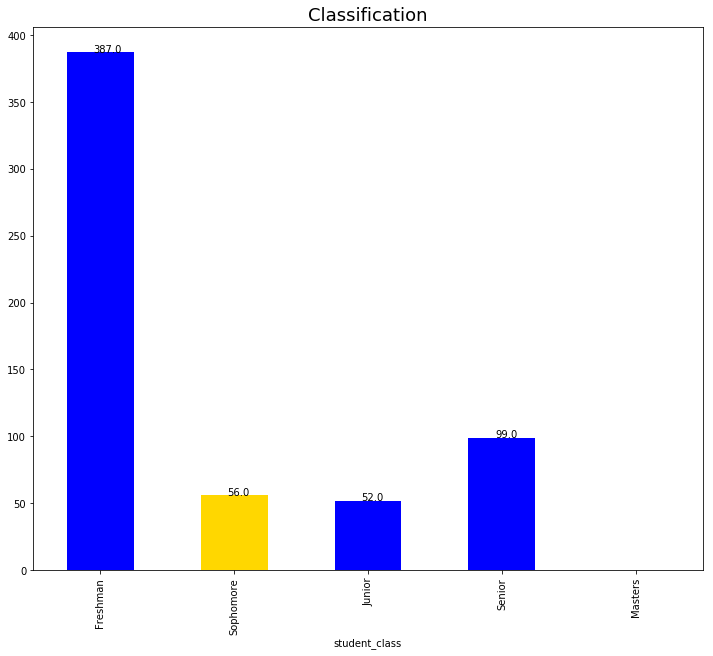

In [35]:
#Visulaize class count as a barchart
'''
I used pandas visualization function, which basically just uses matplotlib's bar plot
Set x-axis and y-axis, figure size and the color of the bars
'''
student_classBar = class_count.plot.bar(x='student_class', y='class_count', figsize=(12,10),color=["blue", "gold"])

#lABEL GRAPH
student_classBar.set_title("Classification", fontsize=18)

#ANNOTATE BARS: If you want to label each bar with the count for the respective parameter
totals = []

# find the values and append to list
for i in student_classBar.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in student_classBar.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        student_classBar.text(i.get_x()+0.2, i.get_height()+0.2, \
            str(i.get_height()), fontsize=10, color='black')

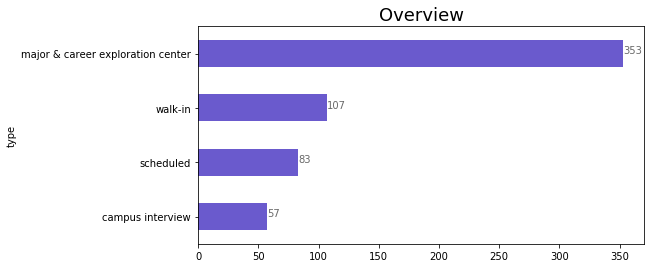

In [36]:
#Summarize and visualize the type of appointments with a horizontal bar chart

appt_type_count = df_data.groupby('type').size()
appt_type_count = appt_type_count.sort_values(ascending=True)
appt_typeBarh = appt_type_count.plot.barh(x='appt_type_count', y='type',figsize=(8,4),color="slateblue")

#lABEL GRAPH
appt_typeBarh.set_title("Overview", fontsize=18)

#SET AXIS
# appt_typeBarh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in appt_typeBarh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in appt_typeBarh.patches:
    # get_width pulls left or right; get_y pushes up or down
    appt_typeBarh.text(i.get_width()+.01, i.get_y()+.25, \
            str(i.get_width()), fontsize=10, color='dimgrey')

# invert for largest on top 
# appt_ServiceBarh.invert_yaxis()

In [37]:
'''
Visualize the services provided by the type of appointment
For example resume review can have walk-in or scheduled
Show the breakdown for appointment types by the service
'''

df_data['COUNTER'] = 0       #initially, set that counter to 0.
group_service = df_data.groupby(['Service Requested', 'type'])['COUNTER'].size()

group_service = group_service.sort_values(ascending=True)
display(group_service.to_frame())

,,COUNTER
Service Requested,type,
Job Shadow,scheduled,1
FOCUS Assessment Interpretation,scheduled,1
Internship/Job Search Assistance,walk-in,1
EQI Feedback Session,scheduled,2
Grad/Professional School,scheduled,3
MACE - Major Exploration,walk-in,3
Other,scheduled,4
Major/Career Exploration,scheduled,11
Career Closet,walk-in,11


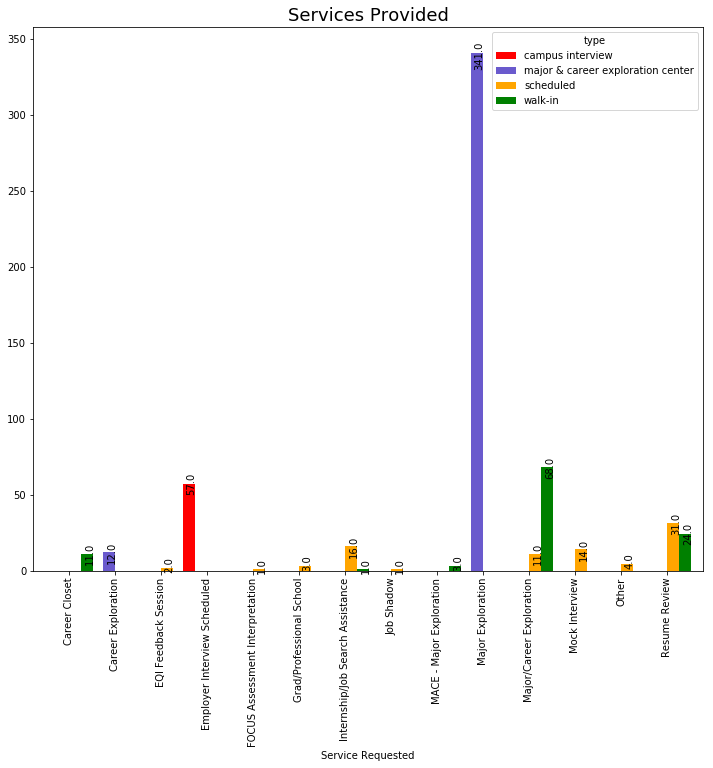

In [56]:
group_service_barh = group_service.unstack().plot(kind='bar',figsize=(12,10), color=['red', 'slateblue', "orange","green"], 
                                                  width=1.05)
group_service_barh.set_alpha(11)

#lABEL GRAPH
group_service_barh.set_title("Services Provided", fontsize=18)
    

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in group_service_barh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in group_service_barh.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        group_service_barh.text(i.get_x()+0.08, i.get_height()+2, \
                str(i.get_height()), fontsize=10, color='black',rotation=90)


,0
college_name,
Arts and Humanities,43
Behavioral and Social Sciences,85
Business,107
Education,29
Engineering and Computing,122
Health Professions,123
Public Health,1
Science and Mathematics,68
VP Academic Affairs,22


Text(0.5, 1.0, 'College')

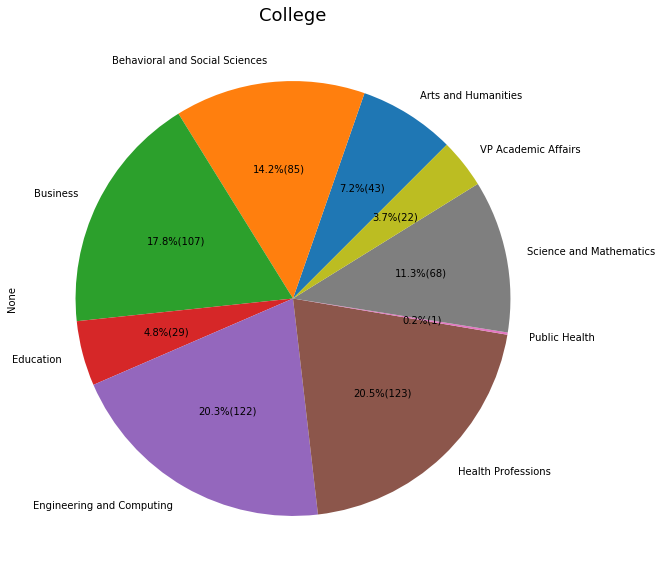

In [39]:
#Summarize attendance by College: Visualize with a pie chart

college_count = df_data.groupby('college_name').size()
display(college_count.to_frame()) #displays the summary as a table


colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
col_plot = college_count.plot(kind='pie', autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*college_count.sum()), 
                              figsize=[10,10], startangle=45) #displays the pie chart
col_plot.set_title("College", fontsize=18) #set title adds a title to the plot